# How does computer vision work?

## Introduction 

Image data is everywhere. Everyone is carrying high-resolution cameras everywhere they go, taking pictures and video and posting them to the internet. Images and video are a major element of medical diagnoses, surveillance and security, self-driving vehicles, and the internet generally. The world produces astronomically more image data than could ever be seen or analyzed by people. We have only started making sense of that data once we developed tools for machine vision.  

Many social networks manage pictures of their users, and want to identify said users in order to classify pictures and better understand the social graph. 

Machine vision is surprisingly easy these days. About 5 years ago, it was a classical talking point to say that computers have a really hard time telling apart something as simple as cats and dogs.  This field has moved so fast that even telling apart dozens of breeds of dogs and cats is trivial.  In fact, we will show just how trivial it is to tell apart even individual humans.

## What is a Convolution?

A convolution is how the input is modified by a filter. In convolutional networks, multiple filters are taken to slice through the image and map them one by one and learn different portions of an input image. Imagine a small filter sliding left to right across the image from top to bottom and that moving filter is looking for, say, a dark edge. Each time a match is found, it is mapped out onto an output image.

<img src="img_cnn/img1.png" width="600"/>

Note that an image is 2 dimensional with width and height. If the image is colored, it is considered to have one more dimension for RGB color. For that reason, 2D convolutions are usually used for black and white images (or gray scale), while 3D convolutions are used for colored images.


### Convolution in 2D

Let’s start with a (4 x 4) input image with no padding and we use a (3 x 3) convolution filter to get an output image.
<img src="img_cnn/img2.png" width="600"/>

The first step is to multiply the yellow region in the input image with a filter. Each element is multiplied with an element in the corresponding location. Then you sum all the results, which is one output value.
<img src="img_cnn/img3.png" width="600"/>

Mathematically, it’s (2 * 1) + (0 * 0) + (1 * 1) + (0 * 0) + (1 * 0) + (0 * 0) + (0 * 0) + (0 * 1) + (1 * 0) = 3

<img src="img_cnn/img4.png" width="600"/>
<img src="img_cnn/img5.png" width="600"/>

How does it look like?

<img src="img_cnn/img_kernel.png" width="600"/>
<img src="img_cnn/conv.gif" width="600"/>


### Convolution in 3D

Convolution in 3D is just like 2D, except you are doing the 2d work 3 times, because there are 3 color channels.

<img src="img_cnn/img6.png" width="700"/>
<img src="img_cnn/img7.png" width="700"/>
<img src="img_cnn/img9.png" width="700"/>



Normally, the width of the output gets smaller, just like the size of the output in 2D case.


## Pooling

Note that pooling is a separate step from convolution. Pooling is used to reduce the image size of width and height. Note that the depth is determined by the number of channels. As the name suggests, all it does is it picks the maximum value in a certain size of the window. Although it’s usually applied spatially to reduce the x, y dimensions of an image.

### Max-Pooling

Max pooling is used to reduce the image size by mapping the size of a given window into a single result by taking the maximum value of the elements in the window.

<img src="img_cnn/img10.png" width="700"/>

### Average-Pooling

It’s same as max-pooling except that it averages the windows instead of picking the maximum value.
<img src="img_cnn/img11.png" width="700"/>


All CNN models follow a similar architecture, as shown in the figure below.

<img src="img_cnn/img12.png" width="700"/>




## Structure of CNNs

CNNs are one of the most popular neural network architectures. They form the foundation of computer vision, though they can also be used in NLP, recommender systems, and more.

In CNNs, alternating layers of convolution and pooling serve to extract features from an image, starting with basic shapes like lines in particular orientations and soon expanding to complicated combinations of the basic shapes. In the end, fully-connected layers allow the net to decide a classification category based on the features that have been extracted by earlier layers.

Diagrams of CNNs will show how the original image gets progressively narrower and deeper, as one layer gets convoluted by several kernels (expanding the depth) and then compressed by a pooling layer (reducing the width). What starts out as a wide image with all the original pixels becomes a deep layer of features with less spatial information:

Image source: [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

<img src="img_cnn/CNN_general2.png" width="700"/>







Here is the actual shape of one famous CNN architecture called VGG 19:

Image source: [What exactly does CNN see?](https://becominghuman.ai/what-exactly-does-cnn-see-4d436d8e6e52)

![CNN_general3.png](img_cnn/CNN_general3.png)

### Biological vision (10 mts)

Have you ever wondered how your own vision works? Let's look at the mammalian eye. It is built out of several layers of neurons, ordered backwards because mammalian evolution got stuck in a suboptimal design. The back layers contain receptors, which send their signals to four other layers of neurons in the retina. The last layer collects its signals and sends them to the optical cortex through the optic nerve:

Image source: [Computer vision : Human Vision](https://courses.cs.washington.edu/courses/cse455/09wi/Lects/lect8.pdf)

<img src="img_cnn/retina.png" width="700"/>

But these cells are not just transmitting raw light patterns to the brain. The retina is processing what it sees. We first figured this out using cats:

Image source: [Computer vision : Human Vision](https://courses.cs.washington.edu/courses/cse455/09wi/Lects/lect8.pdf)

<img src="img_cnn/catexp1.png" width="600"/>

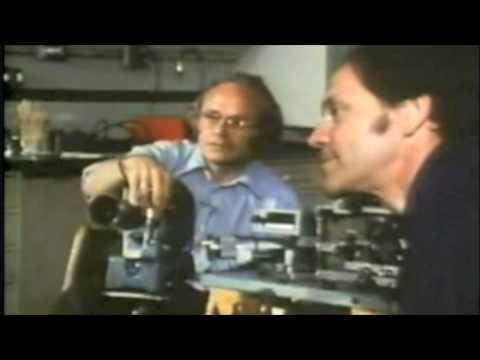

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4', width=800, height=500)

Receptors are detecting photons themselves. The ganglion cells which are a few layers deeper, though, are detecting edges, shadows, and colors. The visual cortex, later on, is also organized in layers and contains the cells that actually respond to lines of a particular orientation.

Rather than going into more detail on how the retina does this, however, let's see how we can make a computer do similar processing.

## Convolutions

**Convolutions** are an operation that finds patterns in an image (we also use the word to talk about the result of such an operation).

An image can be represented as a large matrix of numbers (for example, in a black-and-white image, white can be 1 and black can be 0). A convolution consists of scanning it with a smaller matrix called a convolution filter (or **kernel**). As we scan the image with the kernel, we get a single number for each location and put that number into a new matrix called the feature map. Each pixel in the kernel gets multiplied by the corresponding pixel in the image, and the results are summed together.  This is all that we need to start detecting edges, or even lines of particular orientations:

Image source: [Understanding Convolutional Neural Networks for NLP](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/)

![Convolution_schematic](img_cnn/Convolution_schematic.gif)

### Exercise 1: (5 mts)

In the image above, the kernel can't scan all the way to the edge, so each new image is smaller than the previous. What could we do to conserve our image size?

**Answer:**

# Necessary libraries

````python
conda install ipython
conda install jupyter
pip install sklearn
pip install scikit-image
pip install imutils
pip install opencv-contrib-python
pip install opencv-python
conda install keras
conda install tensorflow
```` 
   




### Exercise 2: (20 mts)
You've actually probably used convolutions before.  They are the basis for all sorts of basic image filtering.  For the next exercise, choose an image and apply a few convolutions.


In [2]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

In [3]:
img_path = 'img_cnn/kitty.png'  # Write the path to your image, relative to the location of the notebook.
# Note that smaller images might work better than really large ones, because the relative size of the
# kernels will be larger.

Let's now load the image and then convert it to grayscale:

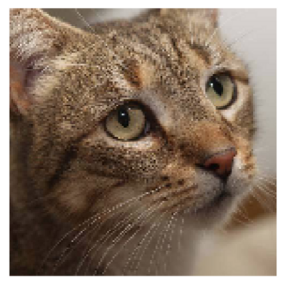

In [4]:
plt.figure(figsize = (5,5))
img = io.imread(img_path)    # Load the image
plt.imshow(img);    # plot the image
plt.axis('off');

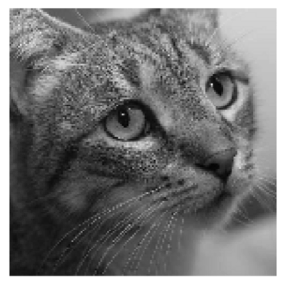

In [5]:
plt.figure(figsize = (5,5))
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
plt.imshow(img, cmap=plt.cm.gray);    # plot the image
plt.axis('off');

#### 2.1

How would you design a 3x3 kernel that blurs an image?

**Answer:**

In [14]:
# Fill in the kernel array
kernel = np.array([[ -3, 0, 3],
                   [ -3, 0, 3],
                   [ -3, 0, 3]])

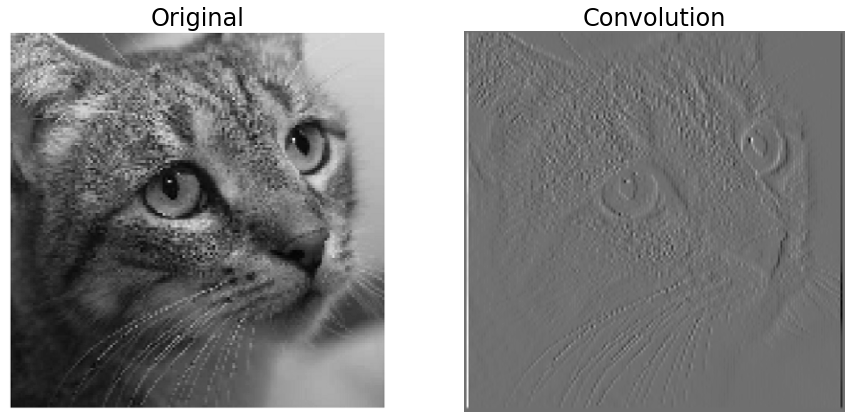

In [15]:
image_new = nd.convolve(img, kernel)

fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Original', fontsize=24);
axes[0].axis('off');


axes[1].imshow(image_new, cmap=plt.cm.gray)    
axes[1].set_title('Convolution', fontsize=24);
axes[1].axis('off');

#### 2.2
How would you change the kernel to blur the image even more?

**Answer:**

In [2]:
# Create the kernel here


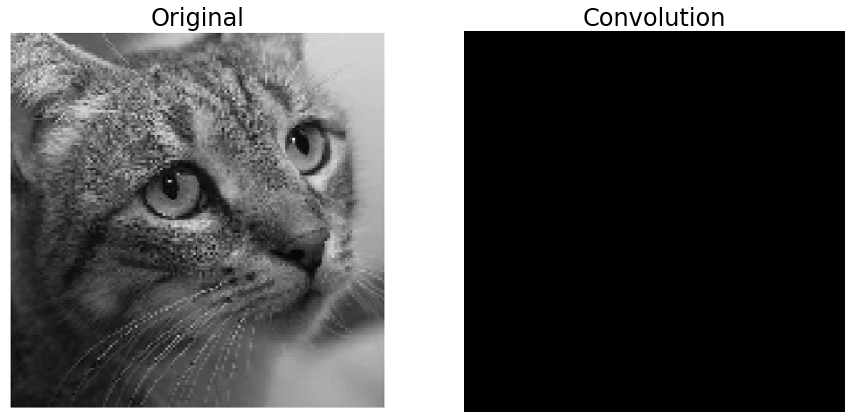

In [15]:
image_new = nd.convolve(img, kernel)

fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Original', fontsize=24);
axes[0].axis('off');


axes[1].imshow(image_new, cmap=plt.cm.gray)    
axes[1].set_title('Convolution', fontsize=24);
axes[1].axis('off');

#### 2.3

How do we make a 3x3 kernel only notice horizontal edges?

**Answer:**

In [26]:
kernel = np.array([[ 0, 0 , 0],
                   [ 0, -10 , 0],
                   [ 0, 0 , 0]])

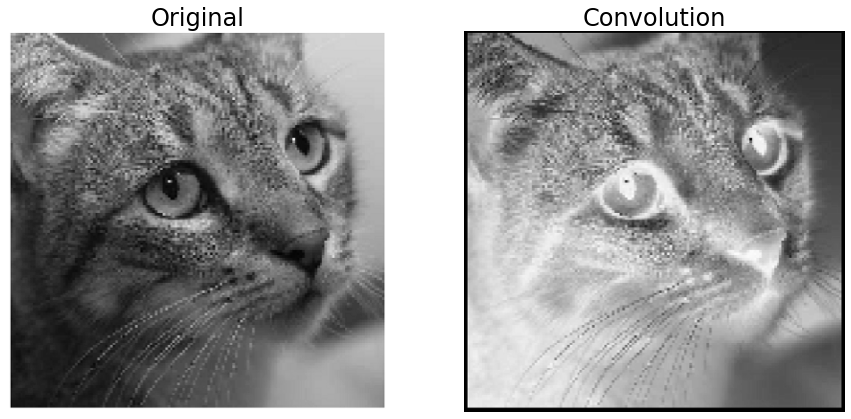

In [27]:
image_new = nd.convolve(img, kernel)

fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Original', fontsize=24);
axes[0].axis('off');


axes[1].imshow(image_new, cmap=plt.cm.gray)    
axes[1].set_title('Convolution', fontsize=24);
axes[1].axis('off');

#### 2.4

How do we make a 3x3 kernel only notice vertical edges?

**Answer:**

In [12]:
kernel = np.array([[ , , ],
                   [ , , ],
                   [ , , ]])

In [ ]:
#su codigo va aqui

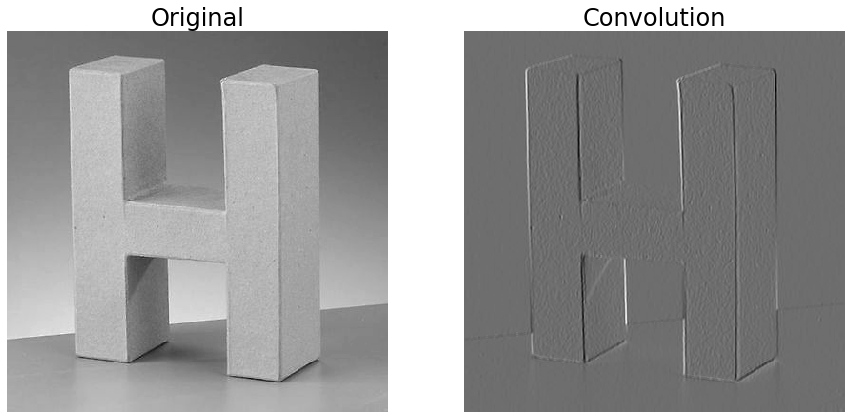

In [13]:
image_new = nd.convolve(img, kernel)

fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Original', fontsize=24);
axes[0].axis('off');


axes[1].imshow(image_new, cmap=plt.cm.gray)    
axes[1].set_title('Convolution', fontsize=24);
axes[1].axis('off');

#### 2.5

How would you design a 3x3 kernel so that it gives a result of 0 when sliding over solid color areas, but gives higher numbers when sliding over an edge (i.e. the kernel detects all edges but only edges)?

**Answer:**

In [14]:
kernel = np.array([[ , , ],
                   [ , , ],
                   [ , , ]])

In [ ]:
#su codigo va aqui

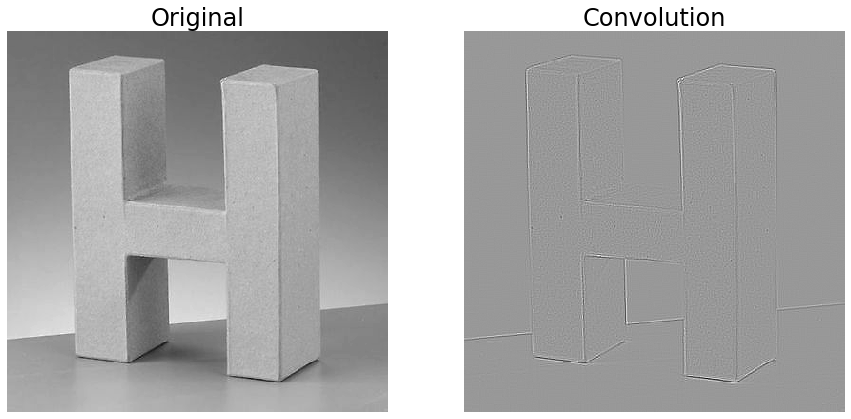

In [15]:
image_new = nd.convolve(img, kernel)

fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Original', fontsize=24);
axes[0].axis('off');


axes[1].imshow(image_new, cmap=plt.cm.gray)    
axes[1].set_title('Convolution', fontsize=24);
axes[1].axis('off');

From this, the architecture of VGG 19 starts to make more sense. As with the retina, we start out with a layer that just detects the levels of light at all points in a surface. We then use convolutions to extract features, and pool the features to get rid of unnecessary spatial information. We do this for several iterations, until we have a narrow, deep set of extracted features. Those features then go into several fully connected layers, which in the end produce a final decision for the model. This is different from biological vision at the detailed level, but the basic architecture is the same and so is the net effect. The CNN can understand lots of high level features, much like a person can:

Image source: [What exactly does CNN see?](https://becominghuman.ai/what-exactly-does-cnn-see-4d436d8e6e52)

![CNN_general3.png](img_cnn/CNN_general3.png)

VGG is a 16 layer neural net, not counting the maxpool layers and the softmax at the end. It’s also referred to as VGG16. The architecture is the one we worked with above. Stacked convolution + pooling layers followed by fully connected ANN. 
<img src="img_cnn/vgg.png" width="500"/>

https://arxiv.org/pdf/1409.1556.pdf



### Data augmentation

One last trick to know about is **data augmentation**. It's always good to train your network on a wide variety of images. Whatever image set you have, you can effectively expand it by an order of magnitude simply by creating variants of your images. Apply various rotations, croppings, and distortions to simulate how real images would vary. The result is a much more general CNN, which can detect features even when they are distorted in real life for whatever reason:

Image source: [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

**Starting image**
<img src="img_cnn/kitty.png" width="300"/>

**Augmented image**
<img src="img_cnn/kitty_aug.png" width="500"/>

## What does a CNN see?

The first layers in a CNN can only see really simple features, like the ones that we saw earlier (e.g. edges, horizontal lines). As we go deeper into the CNN, each layer can combine the features detected in previous layers into ever more complicated features. Straght edges become corners, curves, and repeating patterns. Those patterns in turn soon become eyes and hands.

In the following collage, we see pictures that cause particularly high activation in the feature maps of a fully trained CNN, along with a representation of what that feature map activation looks like. We can think of it as what the network noticed in each image:

### Layer 1
![layer1](img_cnn/layer1.png)

### Layer 2
![layer2](img_cnn/layer2.png)

### Layer 3
![layer3](img_cnn/layer3.png)

Source: [Visualizing and Understanding Convolutional Networks](https://arxiv.org/abs/1311.2901)

Another way to know what the CNN is noticing is to hide parts of the image with a gray block, and see which pixels are important for correct classification. If you slide the gray block around, you can see in blue the parts of the image that were essential for good classification:

![occlusion](img_cnn/occlusion.png)

Source: [Visualizing what ConvNets learn](http://cs231n.github.io/understanding-cnn/)

## Other CNN architectures 

Over the years, different individuals have developed variants of the basic CNN architecture. We saw the details of VGG-19 above, and in the following demonstration we'll use a pre-trained ResNet34. This is U-Net, an architecture that has proven really useful for biomedical image segmentation:

Image source: [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)

<img src="img_cnn/unet.png" width="800"/>

Here is a comparison of several different architectures for image recognition in general. Image source: [Neural Network Architectures](https://towardsdatascience.com/neural-network-architectures-156e5bad51ba)

<img src="img_cnn/network_architectures.jpeg" width="700"/>

## Conclusions

In this case, we look at the internals of one of the most useful deep learning architectures out there. We learned how to generate our own convolutions to detect simple features, and learned how a CNN synthesizes these basic inputs to generate more and more complex features as it goes deeper into the layers. We then used powerful pre-trained CNN models to solve custom problems in machine vision.

